In [1]:
import pandas as pd

In [13]:
# The column we are checking for uniqueness
target_column = 'Uzvaretaja_registracijas_numurs'
# Sort the DataFrame by the target column (and optionally another column to define the "last" row)
df_sorted = df.sort_values(by=[target_column])
# Mark duplicates, keep the last occurrence
duplicates_mask = df_sorted.duplicated(subset=[target_column], keep='last')
# Filter out rows where the target column is duplicated
result_df = df_sorted[~duplicates_mask]
# If you want to reset the index of the result DataFrame
result_df = result_df[["Uzvaretaja_registracijas_numurs", "Uzvaretaja_nosaukums"]]
result_df = result_df[result_df["Uzvaretaja_registracijas_numurs"] != ""]
result_df.reset_index(drop=True, inplace=True)
result_df

,Uzvaretaja_registracijas_numurs,Uzvaretaja_nosaukums
0,0100108007,Vinexad National Trade Fair & Advertising Comp...
1,01115210134,Romualds Pipars
2,03086910607,Ilze Poķe
3,03275590283,Henoto S.P.A.
4,04097111362,Kārlis Saržants
...,...,...
2611,PL9731013938,Ekoenergetyka - Polska S.A.
2612,SE556309174201,Bjorkemar Construction & Consulting 'BCC AB'
2613,SE556561820301,Inter Agro Skog AB
2614,SE556577236401,Bruker Nordic AB


In [ ]:
from modules import embeddings

In [23]:
reg_no = "04244004"
DATASET_FIELDS = [
    'Iepirkuma_nosaukums',
    'Ir_dalijums_dalas',
    'Iepirkuma_dalas_nosaukums'
]
# sub_df = df[df["Uzvaretaja_registracijas_numurs"] == reg_no][DATASET_FIELDS]
sub_df = df[DATASET_FIELDS]
sub_df

,Iepirkuma_nosaukums,Ir_dalijums_dalas,Iepirkuma_dalas_nosaukums
0,"Skatītāju krēslu iegāde, piegāde un uzstādīšan...",Nē,
1,Jauna pasažieru autobusa iegāde,Nē,
2,LOFAR datu apstrādes un uzglabāšanas risinājums,Nē,
3,Jauna vieglā pasažieru transportlīdzekļa iegāde,Nē,
4,Ventspils Augstskolas “A” un “B” korpusu telpu...,Nē,
...,...,...,...
11658,Ceļu un ielas mehanizētā attīrīšana no sniega ...,Nē,
11659,Ceļu un ielas mehanizētā attīrīšana no sniega ...,Nē,
11660,Elektroenerģijas iegāde Ventspils valstspilsēt...,Nē,
11661,Doksorubicīna hidrohlorīds 50mg/25 ml šķīdums ...,Nē,


In [2]:
from modules import iepirkumi

In [3]:
fname = iepirkumi.prepare_winners()
fname

'./tmp/winners_main.pkl'

In [4]:
import pandas as pd

In [5]:
df = pd.read_pickle(fname)
df

,Iepirkuma_ID,Iepirkuma_nosaukums,Iepirkuma_identifikacijas_numurs,Pasutitaja_nosaukums,Pasutitaja_registracijas_numurs,Pasutitaja_registracijas_numura_veids,Iepirkuma_statuss,Regulejasais_tiesibu_akts,Proceduras_veids,Hipersaite_EIS_kura_pieejams_zinojums,Hipersaite_uz_IUB_publikaciju,Ir_dalijums_dalas,Iepirkuma_dalas_nr,Iepirkuma_dalas_nosaukums,Iepirkuma_dalas_statuss,Uzvaretaja_nosaukums,Uzvaretaja_registracijas_numurs,Uzvaretaja_registracijas_numura_veids,Uzvaretaja_valsts
0,10389,"Skatītāju krēslu iegāde, piegāde un uzstādīšan...",SNP 2018/05/AK,Siguldas novada pašvaldība,90000048152,Personas kods/nodokļu maksātāja reģistrācijas ...,Noslēgts,Publisko iepirkumu likums,Atklāts konkurss,https://www.eis.gov.lv/EKEIS/Supplier/Procurem...,,Nē,,,,'JS Baltic' UAB,LT100006892019,PVN maksātāja numurs,LTU
1,10690,Jauna pasažieru autobusa iegāde,LNP 2018/15,Ludzas novada pašvaldība,90000017453,Personas kods/nodokļu maksātāja reģistrācijas ...,Noslēgts,Publisko iepirkumu likums,Atklāts konkurss,https://www.eis.gov.lv/EKEIS/Supplier/Procurem...,,Nē,,,,'ALKOM-TRANS' SIA,40003067391,PVN maksātāja numurs,LVA
2,11079,LOFAR datu apstrādes un uzglabāšanas risinājums,VeA2018/8,Ventspils Augstskola,90000362426,PVN maksātāja numurs,Noslēgts,Publisko iepirkumu likums,Atklāts konkurss,https://www.eis.gov.lv/EKEIS/Supplier/Procurem...,,Nē,,,,'Datakom' SIA,40103142605,PVN maksātāja numurs,LVA
3,11273,Jauna vieglā pasažieru transportlīdzekļa iegāde,LNP 2018/20,Ludzas novada pašvaldība,90000017453,Personas kods/nodokļu maksātāja reģistrācijas ...,Noslēgts,Publisko iepirkumu likums,Atklāts konkurss,https://www.eis.gov.lv/EKEIS/Supplier/Procurem...,,Nē,,,,'TC MOTORS' SIA,40003387085,PVN maksātāja numurs,LVA
4,11640,Ventspils Augstskolas “A” un “B” korpusu telpu...,VeA2018/7,Ventspils Augstskola,90000362426,PVN maksātāja numurs,Noslēgts,Publisko iepirkumu likums,Atklāts konkurss,https://www.eis.gov.lv/EKEIS/Supplier/Procurem...,,Nē,,,,'R un S' SIA,51203033331,PVN maksātāja numurs,LVA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35971,123567,Doksorubicīna hidrohlorīds 50mg/25 ml šķīdums ...,RAKUS 2024/57S,Rīgas Austrumu klīniskā universitātes slimnīca,40003951628,Personas kods/nodokļu maksātāja reģistrācijas ...,Līgums noslēgts,Publisko iepirkumu likums,Sarunu procedūra,https://www.eis.gov.lv/EKEIS/Supplier/Procurem...,,Nē,,,,SIA 'GP Nord',40203177406,,LVA
35972,123715,Datortomogrāfijas iekārtas OPTIMA CT520 rentge...,PSIA ĀDAŽU SLIMNĪCA 2024/02M,"Ādažu slimnīca, PSIA",40003131022,Personas kods/nodokļu maksātāja reģistrācijas ...,Līgums noslēgts,Publisko iepirkumu likums,Mazie iepirkumi,https://www.eis.gov.lv/EKEIS/Supplier/Procurem...,,Nē,,,,SIA “TRADINTEK”,40003308634,,LVA
35973,123882,Piena pārstrādes produktu piegāde Raunas pamat...,SNP/2024/2/SP,Smiltenes novada pašvaldība,90009067337,Personas kods/nodokļu maksātāja reģistrācijas ...,Līgums noslēgts,Publisko iepirkumu likums,Sarunu procedūra,https://www.eis.gov.lv/EKEIS/Supplier/Procurem...,,Nē,,,,'Laki Fruit' SIA,40003669241,,LVA
35974,123898,Ugunsnoturīgu cepuru – pilnsejas masku un ugun...,VALIC2022/028/EN-P-AK,Valsts aizsardzības loģistikas un iepirkumu ce...,40900035122,PVN maksātāja numurs,Līgums noslēgts,Publisko iepirkumu likums,Atklāts konkurss,https://www.eis.gov.lv/EKEIS/Supplier/Procurem...,,Nē,,,,'FN-SERVISS' SIA,40003606424,,LVA


In [5]:
titles = []
for _, row in df.iterrows():
    if row["Ir_dalijums_dalas"] == "Nē":
        titles.append(row["Iepirkuma_nosaukums"])
    else:
        titles.append(row["Iepirkuma_dalas_nosaukums"])
titles

['Skatītāju krēslu iegāde, piegāde un uzstādīšana Siguldas novada Kultūras centram',
 'Jauna pasažieru autobusa iegāde',
 'LOFAR datu apstrādes un uzglabāšanas risinājums',
 'Jauna vieglā pasažieru transportlīdzekļa iegāde',
 'Ventspils Augstskolas “A” un “B” korpusu telpu vienkāršotā atjaunošana',
 'Auditoriju mēbeļu piegāde un uzstādīšana Ventspils Augstskolā',
 'Drukas iekārtu izejmateriāli',
 'Drukas iekārtu izejmateriāli',
 'Drukas iekārtu izejmateriāli',
 'Drukas iekārtu izejmateriāli',
 'Drukas iekārtu izejmateriāli',
 'Drukas iekārtu izejmateriāli',
 'Drukas iekārtu izejmateriāli',
 'Drukas iekārtu izejmateriāli',
 'Drukas iekārtu izejmateriāli',
 'Drukas iekārtu izejmateriāli',
 'Drukas iekārtu izejmateriāli',
 'Multivides iekārtu piegāde un uzstādīšana Ventspils Augstskolā',
 'Serveri un lenšu bibliotēka,',
 'Tīkla iekārtas',
 'Rīgas radio un televīzijas stacijas pārbūves būvprojekta ekspertīzes veikšana',
 'Lielupes pamatskolas pārbūves un sporta zāles piebūves būvprojekta i

In [6]:
from modules import embeddings

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['embeddings.position_ids']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['embeddings.position_ids']
- This IS expected if you are initializing TFBertModel from a PyTorch model trai

In [ ]:
embeds = embeddings.generate_embeddings_from_texts(titles)

 64/282 [=====>........................] - ETA: 27:51

In [7]:
import numpy as np

In [33]:
winner_embeds = np.load("./tmp/winner_embeds.npy")
active_embeds = np.load("./tmp/active_embeds.npy")


In [34]:
active_embeds.shape

(2189, 50)

In [32]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Assuming `embeddings` is your matrix of BERT embeddings
pca = PCA(n_components=50)  # or any suitable number of components
winner_embeds = pca.fit_transform(winner_embeds)
active_embeds = pca.transform(active_embeds)

with open("./tmp/active_embeds.npy", "wb") as f:
    np.save(f, active_embeds)
with open("./tmp/winner_embeds.npy", "wb") as f:
    np.save(f, winner_embeds)

In [22]:
type(reduced_embeddings)

numpy.ndarray

In [35]:

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


/Users/edgarsgogolevs/.python-venvs/py311DataSpell/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/edgarsgogolevs/.python-venvs/py311DataSpell/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/edgarsgogolevs/.python-venvs/py311DataSpell/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/edgarsgogolevs/.python-venvs/py311DataSpell/lib/python3.1

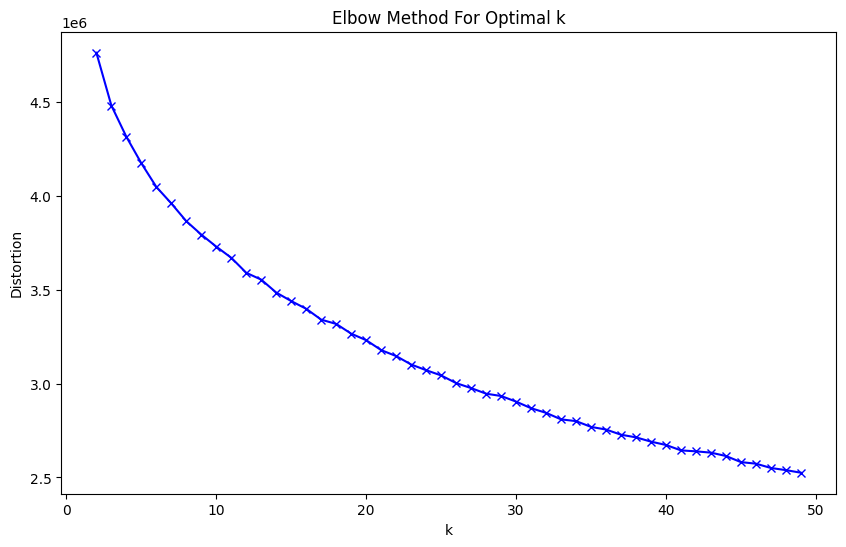

In [16]:

# Determine the optimal number of clusters using the elbow method
distortions = []
K = range(2, 50)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(reduced_embeddings)
    distortions.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method For Optimal k')
plt.show()


In [36]:
optimal_k = 20
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(embeds)

/Users/edgarsgogolevs/.python-venvs/py311DataSpell/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [37]:
df['cluster'] = clusters

In [38]:
df

,Iepirkuma_ID,Iepirkuma_nosaukums,Iepirkuma_identifikacijas_numurs,Pasutitaja_nosaukums,Pasutitaja_registracijas_numurs,Pasutitaja_registracijas_numura_veids,Iepirkuma_statuss,Regulejasais_tiesibu_akts,Proceduras_veids,Hipersaite_EIS_kura_pieejams_zinojums,Hipersaite_uz_IUB_publikaciju,Ir_dalijums_dalas,Iepirkuma_dalas_nr,Iepirkuma_dalas_nosaukums,Iepirkuma_dalas_statuss,Uzvaretaja_nosaukums,Uzvaretaja_registracijas_numurs,Uzvaretaja_registracijas_numura_veids,Uzvaretaja_valsts,cluster
0,10389,"Skatītāju krēslu iegāde, piegāde un uzstādīšan...",SNP 2018/05/AK,Siguldas novada pašvaldība,90000048152,Personas kods/nodokļu maksātāja reģistrācijas ...,Noslēgts,Publisko iepirkumu likums,Atklāts konkurss,https://www.eis.gov.lv/EKEIS/Supplier/Procurem...,,Nē,,,,'JS Baltic' UAB,LT100006892019,PVN maksātāja numurs,LTU,6
1,10690,Jauna pasažieru autobusa iegāde,LNP 2018/15,Ludzas novada pašvaldība,90000017453,Personas kods/nodokļu maksātāja reģistrācijas ...,Noslēgts,Publisko iepirkumu likums,Atklāts konkurss,https://www.eis.gov.lv/EKEIS/Supplier/Procurem...,,Nē,,,,'ALKOM-TRANS' SIA,40003067391,PVN maksātāja numurs,LVA,10
2,11079,LOFAR datu apstrādes un uzglabāšanas risinājums,VeA2018/8,Ventspils Augstskola,90000362426,PVN maksātāja numurs,Noslēgts,Publisko iepirkumu likums,Atklāts konkurss,https://www.eis.gov.lv/EKEIS/Supplier/Procurem...,,Nē,,,,'Datakom' SIA,40103142605,PVN maksātāja numurs,LVA,3
3,11273,Jauna vieglā pasažieru transportlīdzekļa iegāde,LNP 2018/20,Ludzas novada pašvaldība,90000017453,Personas kods/nodokļu maksātāja reģistrācijas ...,Noslēgts,Publisko iepirkumu likums,Atklāts konkurss,https://www.eis.gov.lv/EKEIS/Supplier/Procurem...,,Nē,,,,'TC MOTORS' SIA,40003387085,PVN maksātāja numurs,LVA,10
4,11640,Ventspils Augstskolas “A” un “B” korpusu telpu...,VeA2018/7,Ventspils Augstskola,90000362426,PVN maksātāja numurs,Noslēgts,Publisko iepirkumu likums,Atklāts konkurss,https://www.eis.gov.lv/EKEIS/Supplier/Procurem...,,Nē,,,,'R un S' SIA,51203033331,PVN maksātāja numurs,LVA,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35971,123567,Doksorubicīna hidrohlorīds 50mg/25 ml šķīdums ...,RAKUS 2024/57S,Rīgas Austrumu klīniskā universitātes slimnīca,40003951628,Personas kods/nodokļu maksātāja reģistrācijas ...,Līgums noslēgts,Publisko iepirkumu likums,Sarunu procedūra,https://www.eis.gov.lv/EKEIS/Supplier/Procurem...,,Nē,,,,SIA 'GP Nord',40203177406,,LVA,3
35972,123715,Datortomogrāfijas iekārtas OPTIMA CT520 rentge...,PSIA ĀDAŽU SLIMNĪCA 2024/02M,"Ādažu slimnīca, PSIA",40003131022,Personas kods/nodokļu maksātāja reģistrācijas ...,Līgums noslēgts,Publisko iepirkumu likums,Mazie iepirkumi,https://www.eis.gov.lv/EKEIS/Supplier/Procurem...,,Nē,,,,SIA “TRADINTEK”,40003308634,,LVA,3
35973,123882,Piena pārstrādes produktu piegāde Raunas pamat...,SNP/2024/2/SP,Smiltenes novada pašvaldība,90009067337,Personas kods/nodokļu maksātāja reģistrācijas ...,Līgums noslēgts,Publisko iepirkumu likums,Sarunu procedūra,https://www.eis.gov.lv/EKEIS/Supplier/Procurem...,,Nē,,,,'Laki Fruit' SIA,40003669241,,LVA,5
35974,123898,Ugunsnoturīgu cepuru – pilnsejas masku un ugun...,VALIC2022/028/EN-P-AK,Valsts aizsardzības loģistikas un iepirkumu ce...,40900035122,PVN maksātāja numurs,Līgums noslēgts,Publisko iepirkumu likums,Atklāts konkurss,https://www.eis.gov.lv/EKEIS/Supplier/Procurem...,,Nē,,,,'FN-SERVISS' SIA,40003606424,,LVA,6


In [39]:
company_profiles = {}

for company in df['Uzvaretaja_registracijas_numurs'].unique():
    company_wins = df[df['Uzvaretaja_registracijas_numurs'] == company]
    cluster_counts = company_wins['cluster'].value_counts().to_dict()
    company_profiles[company] = cluster_counts
company_profiles

{'LT100006892019': {6: 3},
 '40003067391': {10: 3, 12: 3, 9: 3, 6: 3},
 '40103142605': {3: 6, 6: 3, 5: 3, 17: 3},
 '40003387085': {10: 3},
 '51203033331': {19: 9, 11: 3},
 '40003140843': {5: 3},
 '40103361909': {3: 6, 14: 3, 7: 3, 6: 3, 12: 3},
 '40103307936': {14: 3},
 '40003728085': {14: 3, 7: 3},
 '40103626253': {14: 3},
 '40003099113': {14: 12},
 '40103214725': {14: 3, 17: 3},
 '41503064521': {14: 3, 6: 3},
 '50003174381': {14: 3},
 '40003088497': {14: 15, 3: 12, 7: 6, 16: 6, 12: 3},
 '40103878435': {14: 3, 17: 3, 6: 3},
 '40103207738': {14: 3},
 '40003482515': {14: 18, 5: 6, 17: 3},
 '40003312822': {3: 27, 6: 9, 16: 6, 19: 3, 7: 3},
 '40103178180': {14: 3},
 '40003236001': {6: 30, 4: 12, 15: 12, 11: 6, 19: 6, 17: 3},
 '40103251384': {19: 3},
 '41203004237': {11: 3},
 '41503034705': {15: 3, 11: 3},
 '44103078595': {17: 24, 11: 3, 9: 3, 4: 3},
 '40103570458': {17: 6, 11: 6},
 '40103490699': {11: 6, 17: 3, 15: 3},
 '41203037168': {17: 3},
 '40003780856': {19: 18, 15: 6},
 '4360301413

In [40]:
active_df = pd.read_pickle(iepirkumi.prepare_iepirkumi())

In [41]:
active_clusters = kmeans.predict(active_embeds)
active_df['cluster'] = active_clusters

In [46]:
def score_procurement_for_company(company_profile, procurement_cluster):
    return company_profile.get(procurement_cluster, 0)

def recommend_procurements_for_company(company_name, n_recommendations=5):
    company_profile = company_profiles.get(company_name, {})
    procurement_scores = []

    for i, procurement in active_df.iterrows():
        score = score_procurement_for_company(company_profile, procurement['cluster'])
        procurement_scores.append((procurement.to_dict(), score))

    procurement_scores = sorted(procurement_scores, key=lambda x: x[1], reverse=True)
    return procurement_scores[:n_recommendations]

# Example usage
recommendations = recommend_procurements_for_company('41203000447')
print(recommendations)

[({'Iepirkuma_ID': '120658', 'Iepirkuma_nosaukums': 'LVC autotransporta tehnisko apkopju un remontdarbu nodrošināšana', 'Iepirkuma_identifikacijas_numurs': 'LVC 2024/43', 'Pasutitaja_nosaukums': "'Latvijas Valsts ceļi' VSIA", 'Pasutitaja_registracijas_numurs': '40003344207', 'Iepirkuma_prieksmeta_veids': 'Pakalpojums', 'CPV_kods_galvenais_prieksmets': '50110000-9 Mehānisko transportlīdzekļu un ar tiem saistītā aprīkojuma remonta un apkopes pakalpojumi', 'CPV_kodi_papildus_prieksmeti': '', 'Iepirkuma_statuss': 'Izsludināts', 'Iepirkuma_izsludinasanas_datums': '15.05.2024', 'Piedavajumu_iesniegsanas_datums': Timestamp('2024-06-18 00:00:00'), 'Piedavajumu_iesniegsanas_laiks': '09:00', 'Precu_vai_pakalpojumu_sniegsanas_vieta': '- (LATVIJA), -', 'Planotais_liguma_darbibas_termina_termina_veids': 'Laiks no līguma noslēgšanas', 'Planotais_liguma_darbibas_termins': '12', 'Regulejasais_tiesibu_akts': 'Publisko iepirkumu likums', 'Proceduras_veids': 'Atklāts konkurss', 'Pasutitaja_kontaktpersona

In [47]:
recommendations[0]

({'Iepirkuma_ID': '120658',
  'Iepirkuma_nosaukums': 'LVC autotransporta tehnisko apkopju un remontdarbu nodrošināšana',
  'Iepirkuma_identifikacijas_numurs': 'LVC 2024/43',
  'Pasutitaja_nosaukums': "'Latvijas Valsts ceļi' VSIA",
  'Pasutitaja_registracijas_numurs': '40003344207',
  'Iepirkuma_prieksmeta_veids': 'Pakalpojums',
  'CPV_kods_galvenais_prieksmets': '50110000-9 Mehānisko transportlīdzekļu un ar tiem saistītā aprīkojuma remonta un apkopes pakalpojumi',
  'CPV_kodi_papildus_prieksmeti': '',
  'Iepirkuma_statuss': 'Izsludināts',
  'Iepirkuma_izsludinasanas_datums': '15.05.2024',
  'Piedavajumu_iesniegsanas_datums': Timestamp('2024-06-18 00:00:00'),
  'Piedavajumu_iesniegsanas_laiks': '09:00',
  'Precu_vai_pakalpojumu_sniegsanas_vieta': '- (LATVIJA), -',
  'Planotais_liguma_darbibas_termina_termina_veids': 'Laiks no līguma noslēgšanas',
  'Planotais_liguma_darbibas_termins': '12',
  'Regulejasais_tiesibu_akts': 'Publisko iepirkumu likums',
  'Proceduras_veids': 'Atklāts konkur

In [49]:
active_df[active_df["Iepirkuma_identifikacijas_numurs"] == "IeM IC 2023/13"]

,Iepirkuma_ID,Iepirkuma_nosaukums,Iepirkuma_identifikacijas_numurs,Pasutitaja_nosaukums,Pasutitaja_registracijas_numurs,Iepirkuma_prieksmeta_veids,CPV_kods_galvenais_prieksmets,CPV_kodi_papildus_prieksmeti,Iepirkuma_statuss,Iepirkuma_izsludinasanas_datums,...,Piedavajuma_iesniegsanas_valoda,Uzvaretaja_izveles_metode,Hipersaite_EIS_kura_pieejams_zinojums,Hipersaite_uz_IUB_publikaciju,Ir_dalijums_dalas,Dalu_iesniegsanas_nosacijumi,Iepirkuma_dalas_nr,Iepirkuma_dalas_nosaukums,Iepirkuma_dalas_statuss,cluster
125,112950,Pašapkalpošanās sistēmas piegādi un uzstādīšan...,IeM IC 2023/13,Iekšlietu ministrijas Informācijas centrs,90000289913,Piegāde,35120000-1 Novērošanas un drošības sistēmas un...,35120000-1 Novērošanas un drošības sistēmas un...,Izsludināts,16.04.2024,...,LATVIEŠU,Saimnieciskā izdevīguma vērtēšana (cenas vai i...,https://www.eis.gov.lv/EKEIS/Supplier/Procurem...,https://eformsb.pvs.iub.gov.lv/show/20ab9422-d...,Nē,,,,,6


In [53]:
df[df["Uzvaretaja_registracijas_numurs"] == "40203040440"]

,Iepirkuma_ID,Iepirkuma_nosaukums,Iepirkuma_identifikacijas_numurs,Pasutitaja_nosaukums,Pasutitaja_registracijas_numurs,Pasutitaja_registracijas_numura_veids,Iepirkuma_statuss,Regulejasais_tiesibu_akts,Proceduras_veids,Hipersaite_EIS_kura_pieejams_zinojums,Hipersaite_uz_IUB_publikaciju,Ir_dalijums_dalas,Iepirkuma_dalas_nr,Iepirkuma_dalas_nosaukums,Iepirkuma_dalas_statuss,Uzvaretaja_nosaukums,Uzvaretaja_registracijas_numurs,Uzvaretaja_registracijas_numura_veids,Uzvaretaja_valsts,cluster
2836,102567,Medikamentu piegāde,Rīgas 2.slimnīca 2023/14 AK,'Rīgas 2. slimnīca' SIA,40003184960,Personas kods/nodokļu maksātāja reģistrācijas ...,Noslēgts,Publisko iepirkumu likums,Atklāts konkurss,https://www.eis.gov.lv/EKEIS/Supplier/Procurem...,,Nē,,,,'Unikmed Baltija' SIA,40203040440,PVN maksātāja numurs,LVA,12
2844,102567,Medikamentu piegāde,Rīgas 2.slimnīca 2023/14 AK,'Rīgas 2. slimnīca' SIA,40003184960,Personas kods/nodokļu maksātāja reģistrācijas ...,Noslēgts,Publisko iepirkumu likums,Atklāts konkurss,https://www.eis.gov.lv/EKEIS/Supplier/Procurem...,,Nē,,,,'Unikmed Baltija' SIA,40203040440,PVN maksātāja numurs,LVA,12
3649,105409,Medikamentu piegāde,JRS 2023/16K,Jēkabpils reģionālā slimnīca,50003356621,Personas kods/nodokļu maksātāja reģistrācijas ...,Līgums noslēgts,Publisko iepirkumu likums,Atklāts konkurss,https://www.eis.gov.lv/EKEIS/Supplier/Procurem...,,Nē,,,,'Unikmed Baltija' SIA,40203040440,PVN maksātāja numurs,LVA,12
5941,110370,Medikamentu un medicīnas palīgmateriālu piegāde,VSIA TOS 2023/53K,"Traumatoloģijas un ortopēdijas slimnīca, VSIA",40003410729,Personas kods/nodokļu maksātāja reģistrācijas ...,Līgums noslēgts,Publisko iepirkumu likums,Atklāts konkurss,https://www.eis.gov.lv/EKEIS/Supplier/Procurem...,https://eformsb.pvs.iub.gov.lv/show/7ff93a6c-6...,Jā,48,Vispārējās anestēzijas līdzekļi – Prilocaini h...,Līgumi noslēgti,'Unikmed Baltija' SIA,40203040440,PVN maksātāja numurs,LVA,3
5942,110370,Medikamentu un medicīnas palīgmateriālu piegāde,VSIA TOS 2023/53K,"Traumatoloģijas un ortopēdijas slimnīca, VSIA",40003410729,Personas kods/nodokļu maksātāja reģistrācijas ...,Līgums noslēgts,Publisko iepirkumu likums,Atklāts konkurss,https://www.eis.gov.lv/EKEIS/Supplier/Procurem...,https://eformsb.pvs.iub.gov.lv/show/7ff93a6c-6...,Jā,49,Vispārējās anestēzijas līdzekļi – Chloroprocai...,Līgumi noslēgti,'Unikmed Baltija' SIA,40203040440,PVN maksātāja numurs,LVA,3
5947,110370,Medikamentu un medicīnas palīgmateriālu piegāde,VSIA TOS 2023/53K,"Traumatoloģijas un ortopēdijas slimnīca, VSIA",40003410729,Personas kods/nodokļu maksātāja reģistrācijas ...,Līgums noslēgts,Publisko iepirkumu likums,Atklāts konkurss,https://www.eis.gov.lv/EKEIS/Supplier/Procurem...,https://eformsb.pvs.iub.gov.lv/show/7ff93a6c-6...,Jā,55,Alfa un beta adrenoreceptoru agonisti - Ephedr...,Līgumi noslēgti,'Unikmed Baltija' SIA,40203040440,PVN maksātāja numurs,LVA,3
6140,110808,Medikamentu piegāde 2024.gadam,ORS 2023/31,"Ogres rajona slimnīca, SIA",40003222317,Personas kods/nodokļu maksātāja reģistrācijas ...,Līgums noslēgts,Publisko iepirkumu likums,Atklāts konkurss,https://www.eis.gov.lv/EKEIS/Supplier/Procurem...,,Nē,,,,'Unikmed Baltija' SIA,40203040440,PVN maksātāja numurs,LVA,17
6672,111758,ĀRSTNIECĪBAS LĪDZEKĻU PIEGĀDE,BKUS 2023/90,'Bērnu klīniskā universitātes slimnīca' VSIA,40003457128,PVN maksātāja numurs,Noslēgts,Publisko iepirkumu likums,Atklāts konkurss,https://www.eis.gov.lv/EKEIS/Supplier/Procurem...,https://eformsb.pvs.iub.gov.lv/show/af2da96c-d...,Nē,,,,'Unikmed Baltija' SIA,40203040440,PVN maksātāja numurs,LVA,8
6674,111758,ĀRSTNIECĪBAS LĪDZEKĻU PIEGĀDE,BKUS 2023/90,'Bērnu klīniskā universitātes slimnīca' VSIA,40003457128,PVN maksātāja numurs,Noslēgts,Publisko iepirkumu likums,Atklāts konkurss,https://www.eis.gov.lv/EKEIS/Supplier/Procurem...,https://eformsb.pvs.iub.gov.lv/show/af2da96c-d...,Nē,,,,'Unikmed Baltija' SIA,40203040440,PVN maksātāja numurs,LVA,8
14828,102567,Medikamentu piegāde,Rīgas 2.slimnīca 2023/14 AK,'Rīgas 2. slimnīca' SIA,40003184

In [55]:
df[df["Uzvaretaja_registracijas_numurs"] == "41503060892"]


,Iepirkuma_ID,Iepirkuma_nosaukums,Iepirkuma_identifikacijas_numurs,Pasutitaja_nosaukums,Pasutitaja_registracijas_numurs,Pasutitaja_registracijas_numura_veids,Iepirkuma_statuss,Regulejasais_tiesibu_akts,Proceduras_veids,Hipersaite_EIS_kura_pieejams_zinojums,Hipersaite_uz_IUB_publikaciju,Ir_dalijums_dalas,Iepirkuma_dalas_nr,Iepirkuma_dalas_nosaukums,Iepirkuma_dalas_statuss,Uzvaretaja_nosaukums,Uzvaretaja_registracijas_numurs,Uzvaretaja_registracijas_numura_veids,Uzvaretaja_valsts,cluster
2874,102694,0.4-20kV elektropārvades līniju trašu tīrīšana...,ST 2023/11,'Sadales tīkls' AS,40003857687,Personas kods/nodokļu maksātāja reģistrācijas ...,Līgums noslēgts,Sabiedrisko pakalpojumu sniedzēju iepirkumu li...,Atklāts konkurss,https://www.eis.gov.lv/EKEIS/Supplier/Procurem...,,Jā,2,Trašu tīrīšana Austrumu Nodaļas Rēzeknes iecir...,Līgumi noslēgti,SIA 'Silvanus New',41503060892,PVN maksātāja numurs,LVA,11
14866,102694,0.4-20kV elektropārvades līniju trašu tīrīšana...,ST 2023/11,'Sadales tīkls' AS,40003857687,Personas kods/nodokļu maksātāja reģistrācijas ...,Līgums noslēgts,Sabiedrisko pakalpojumu sniedzēju iepirkumu li...,Atklāts konkurss,https://www.eis.gov.lv/EKEIS/Supplier/Procurem...,,Jā,2,Trašu tīrīšana Austrumu Nodaļas Rēzeknes iecir...,Līgumi noslēgti,SIA 'Silvanus New',41503060892,PVN maksātāja numurs,LVA,11
26858,102694,0.4-20kV elektropārvades līniju trašu tīrīšana...,ST 2023/11,'Sadales tīkls' AS,40003857687,Personas kods/nodokļu maksātāja reģistrācijas ...,Līgums noslēgts,Sabiedrisko pakalpojumu sniedzēju iepirkumu li...,Atklāts konkurss,https://www.eis.gov.lv/EKEIS/Supplier/Procurem...,,Jā,2,Trašu tīrīšana Austrumu Nodaļas Rēzeknes iecir...,Līgumi noslēgti,SIA 'Silvanus New',41503060892,PVN maksātāja numurs,LVA,11
